# Brunt ice shelf
### Calculate the extraction coordinates

In [1]:
import icepack
import geojson
import numpy as np
import icepack.plot
import rasterio
import math
#import firedrake
#from firedrake import assemble, inner, dx
#from icepack.constants import (
#    ice_density as ρ_I,
#    water_density as ρ_W,
#    gravity as g,
#)
#from firedrake import grad
#from firedrake import ds
#import tqdm
import matplotlib.pyplot as plt
import pickle

### Set variables

In [2]:
#Distance of extraction point from rift walls
dist_buffer = 100

### Geometry

In [3]:
outline_2020 = '/home/sermilik/brunt_model/d01_pre_calving/brunt_HC_2020.geojson'
outline_calv = '/home/sermilik/brunt_model/d02_calving/brunt_HC_2021_calving_coarse.geojson'
outline_2021 = '/home/sermilik/brunt_model/d03_post_calving/brunt_HC_2021.geojson'

with open(outline_2020,"r") as outline_file_2020:
    outline_2020 = geojson.load(outline_file_2020)
    
with open(outline_calv,"r") as outline_file_calv:
    outline_calv = geojson.load(outline_file_calv)
    
with open(outline_2021,"r") as outline_file_2021:
    outline_2021 = geojson.load(outline_file_2021)
    
print(outline_2020["crs"]["properties"]["name"])
print(outline_calv["crs"]["properties"]["name"])
print(outline_2021["crs"]["properties"]["name"])

urn:ogc:def:crs:EPSG::3031
urn:ogc:def:crs:EPSG::3031
urn:ogc:def:crs:EPSG::3031


In [4]:
δ = 50e3
coords = np.array(list(geojson.utils.coords(outline_2020)))
xmin, xmax = coords[:, 0].min() - δ, coords[:, 0].max() + δ
ymin, ymax = coords[:, 1].min() - δ, coords[:, 1].max() + δ

### Imagery

In [5]:
image_filename = icepack.datasets.fetch_mosaic_of_antarctica()
image_file = rasterio.open(image_filename, "r")

transform = image_file.transform
window = rasterio.windows.from_bounds(
    left=xmin, bottom=ymin, right=xmax, top=ymax, transform=transform
)

image = image_file.read(indexes=1, window=window, masked=True)

# define extent for rift extraction points
xmin_ew = -692000
xmax_ew = -672000
ymin_ew = 1425000
ymax_ew = 1445000

### ICESat-2/rift arrays

In [6]:
with open("output_icesat2_arrays.pkl", "rb") as f1:
    icesat2_arrays = pickle.load(f1)
f1.close()

easting_215_1L = icesat2_arrays["easting_215_1L"]
northing_215_1L = icesat2_arrays["northing_215_1L"]
easting_215_1R = icesat2_arrays["easting_215_1R"]
northing_215_1R = icesat2_arrays["northing_215_1R"]

easting_1160_3L = icesat2_arrays["easting_1160_3L"]
northing_1160_3L = icesat2_arrays["northing_1160_3L"]
easting_1160_3R = icesat2_arrays["easting_1160_3R"]
northing_1160_3R = icesat2_arrays["northing_1160_3R"]

easting_786_2L = icesat2_arrays["easting_786_2L"]
northing_786_2L = icesat2_arrays["northing_786_2L"]
easting_786_2R = icesat2_arrays["easting_786_2R"]
northing_786_2R = icesat2_arrays["northing_786_2R"]

easting_283_1L = icesat2_arrays["easting_283_1L"]
northing_283_1L = icesat2_arrays["northing_283_1L"]
easting_283_1R = icesat2_arrays["easting_283_1R"]
northing_283_1R = icesat2_arrays["northing_283_1R"]

easting_725_3L = icesat2_arrays["easting_725_3L"]
northing_725_3L = icesat2_arrays["northing_725_3L"]
easting_725_3R = icesat2_arrays["easting_725_3R"]
northing_725_3R = icesat2_arrays["northing_725_3R"]

easting_1099_2L = icesat2_arrays["easting_1099_2L"]
northing_1099_2L = icesat2_arrays["northing_1099_2L"]
easting_1099_2R = icesat2_arrays["easting_1099_2R"]
northing_1099_2R = icesat2_arrays["northing_1099_2R"]

with open("output_rift_arrays.pkl", "rb") as f2:
    rift_arrays = pickle.load(f2)
f2.close()

riftx = rift_arrays["riftx"]
rifty = rift_arrays["rifty"]
HC_sea_2020 = rift_arrays["HC_sea_2020"]
HC_land_2020 = rift_arrays["HC_land_2020"]
HC_sea_2021 = rift_arrays["HC_sea_2021"]
HC_land_2021 = rift_arrays["HC_land_2021"]
HC_sea_calv = rift_arrays["HC_sea_calv"]
HC_land_calv = rift_arrays["HC_land_calv"]


### Rift in 2020

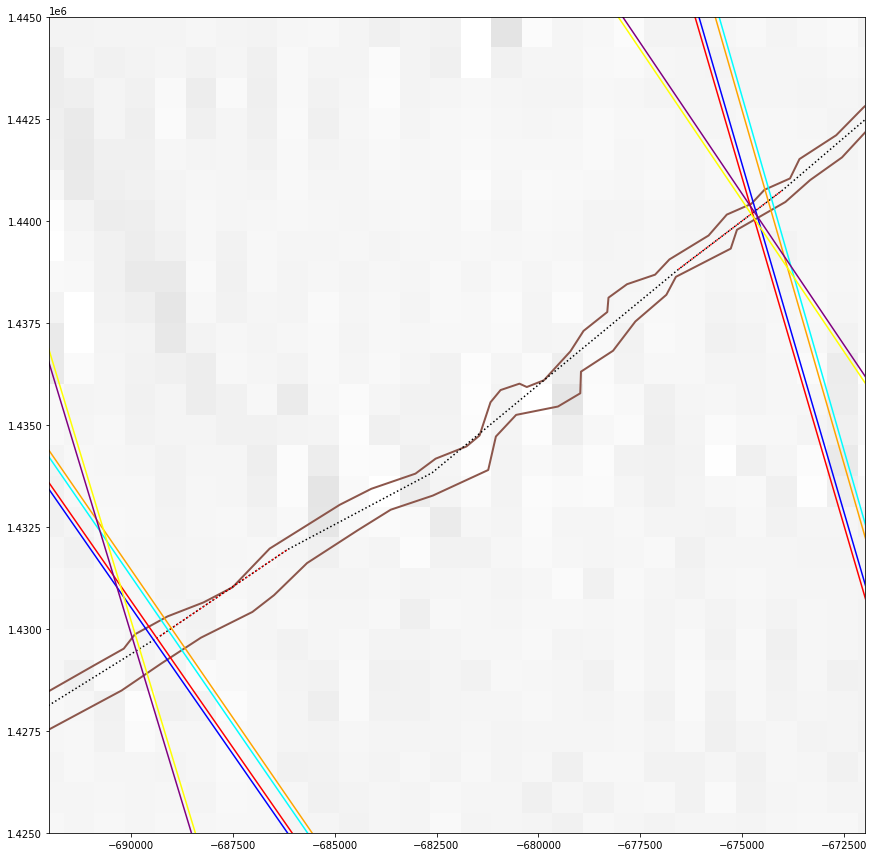

In [7]:
xmin, ymin, xmax, ymax = rasterio.windows.bounds(window, transform)
extent = (xmin, xmax, ymin, ymax)

fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)

axes.plot(riftx,rifty,'k:')

axes.plot(riftx[4:6],rifty[4:6],'r:')
axes.plot(riftx[8:10],rifty[8:10],'r:')

axes.plot(easting_215_1L,northing_215_1L,'orange')
axes.plot(easting_215_1R,northing_215_1R,'cyan')
axes.plot(easting_1160_3L,northing_1160_3L,'r')
axes.plot(easting_1160_3R,northing_1160_3R,'b')
axes.plot(easting_786_2L,northing_786_2L,'purple')
axes.plot(easting_786_2R,northing_786_2R,'yellow')

axes.plot(easting_725_3L,northing_725_3L,'orange')
axes.plot(easting_725_3R,northing_725_3R,'cyan')
axes.plot(easting_283_1L,northing_283_1L,'r')
axes.plot(easting_283_1R,northing_283_1R,'b')
axes.plot(easting_1099_2L,northing_1099_2L,'purple')
axes.plot(easting_1099_2R,northing_1099_2R,'yellow')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### Rift at calving

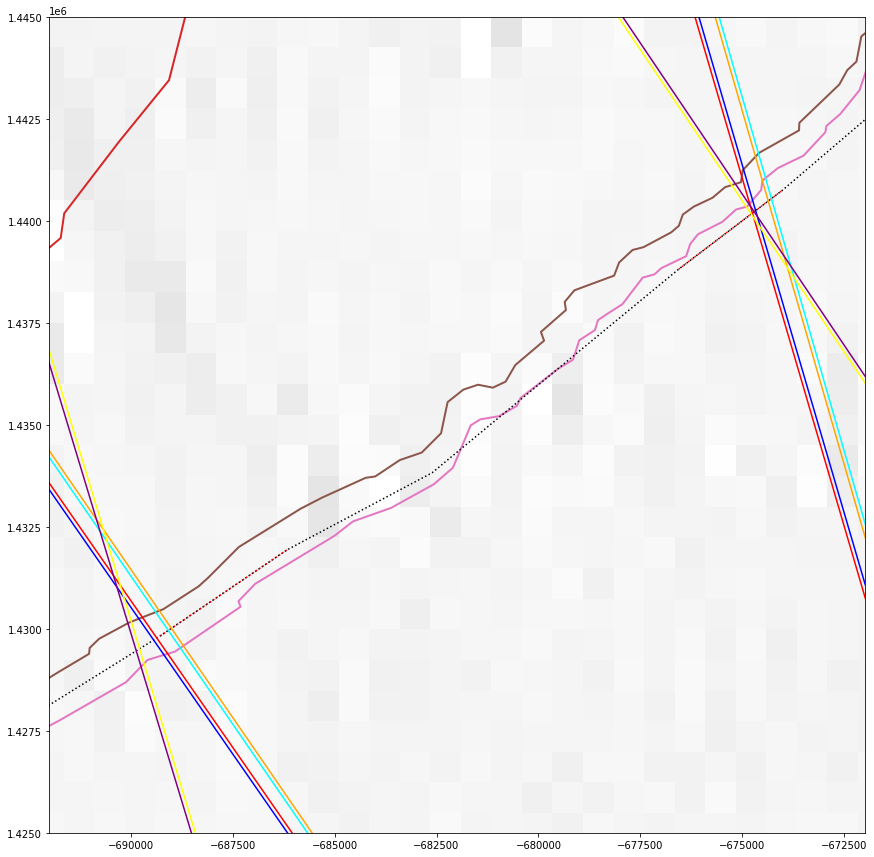

In [8]:
fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)

axes.plot(riftx,rifty,'k:')

axes.plot(riftx[4:6],rifty[4:6],'r:')
axes.plot(riftx[8:10],rifty[8:10],'r:')

axes.plot(easting_215_1L,northing_215_1L,'orange')
axes.plot(easting_215_1R,northing_215_1R,'cyan')
axes.plot(easting_1160_3L,northing_1160_3L,'r')
axes.plot(easting_1160_3R,northing_1160_3R,'b')
axes.plot(easting_786_2L,northing_786_2L,'purple')
axes.plot(easting_786_2R,northing_786_2R,'yellow')

axes.plot(easting_725_3L,northing_725_3L,'orange')
axes.plot(easting_725_3R,northing_725_3R,'cyan')
axes.plot(easting_283_1L,northing_283_1L,'r')
axes.plot(easting_283_1R,northing_283_1R,'b')
axes.plot(easting_1099_2L,northing_1099_2L,'purple')
axes.plot(easting_1099_2R,northing_1099_2R,'yellow')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### Rift in 2021

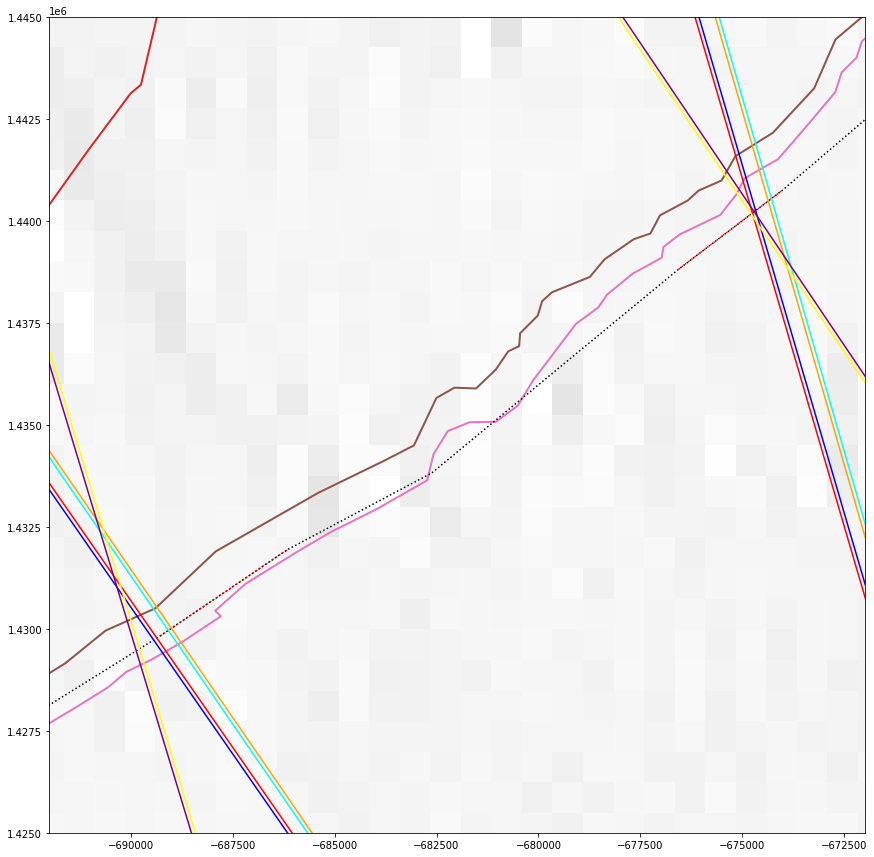

In [9]:
fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)

axes.plot(riftx,rifty,'k:')

axes.plot(riftx[4:6],rifty[4:6],'r:')
axes.plot(riftx[8:10],rifty[8:10],'r:')

axes.plot(easting_215_1L,northing_215_1L,'orange')
axes.plot(easting_215_1R,northing_215_1R,'cyan')
axes.plot(easting_1160_3L,northing_1160_3L,'r')
axes.plot(easting_1160_3R,northing_1160_3R,'b')
axes.plot(easting_786_2L,northing_786_2L,'purple')
axes.plot(easting_786_2R,northing_786_2R,'yellow')

axes.plot(easting_725_3L,northing_725_3L,'orange')
axes.plot(easting_725_3R,northing_725_3R,'cyan')
axes.plot(easting_283_1L,northing_283_1L,'r')
axes.plot(easting_283_1R,northing_283_1R,'b')
axes.plot(easting_1099_2L,northing_1099_2L,'purple')
axes.plot(easting_1099_2R,northing_1099_2R,'yellow')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### ICESat-2 groundtracks near rift and rift perpendicular axis

western pair: -34.2 deg
eastern pair: -37.3 deg


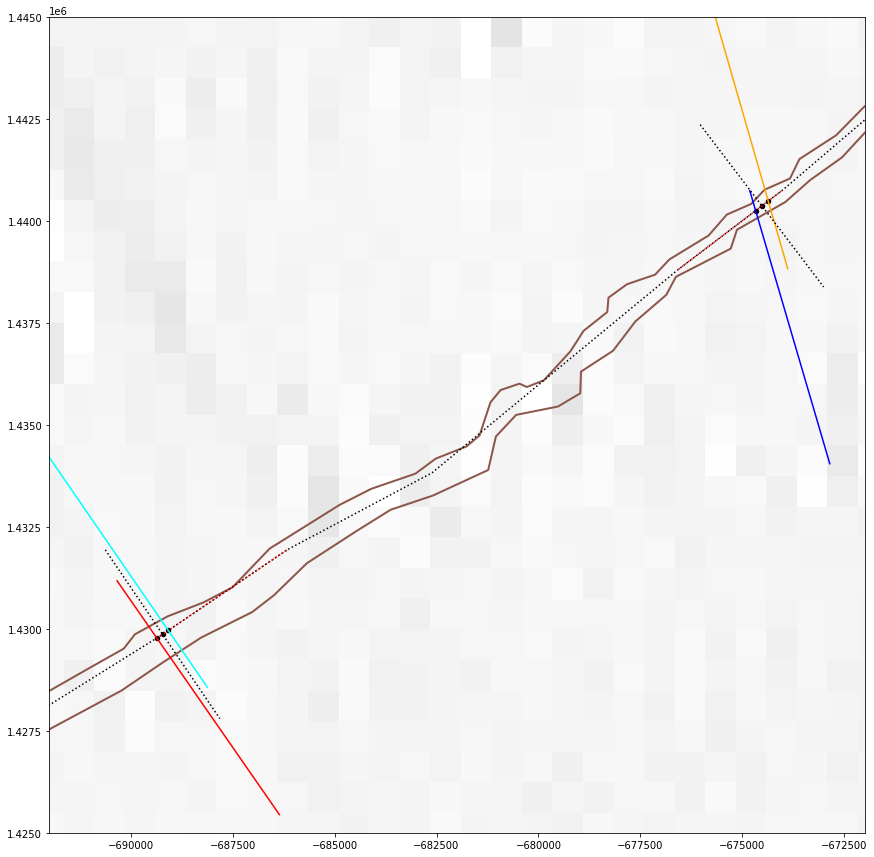

In [10]:
fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)
        
#for feature in outline_2021["features"]:
#    for line_string in feature["geometry"]["coordinates"]:
#        xs = np.array(line_string)
#        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)        

axes.plot(riftx,rifty,'k:')

axes.plot(riftx[4:6],rifty[4:6],'r:')
axes.plot(riftx[8:10],rifty[8:10],'r:')

#axes.plot(easting_215_1L,northing_215_1L,'orange')
axes.plot(easting_215_1R[47:49],northing_215_1R[47:49],'cyan')
axes.plot(easting_1160_3L[47:49],northing_1160_3L[47:49],'r')
#axes.plot(easting_1160_3R,northing_1160_3R,'b')
#axes.plot(easting_786_2L,northing_786_2L,'purple')
#axes.plot(easting_786_2R,northing_786_2R,'yellow')

axes.plot(easting_725_3L[53:55],northing_725_3L[53:55],'orange')
#axes.plot(easting_725_3R,northing_725_3R,'cyan')
#axes.plot(easting_283_1L,northing_283_1L,'r')
axes.plot(easting_283_1R[54:56],northing_283_1R[54:56],'b')
#axes.plot(easting_1099_2L,northing_1099_2L,'purple')
#axes.plot(easting_1099_2R,northing_1099_2R,'yellow')

#Angles
#rift 4-5
ediff_45 = riftx[5]-riftx[4]
ndiff_45 = rifty[5]-rifty[4]

rift_45_perp = (math.atan(ediff_45/ndiff_45))-(np.pi/2)
print("western pair: "+str(round(math.degrees(rift_45_perp),1))+" deg")

#rift 8-9
ediff_89 = riftx[9]-riftx[8]
ndiff_89 = rifty[9]-rifty[8]

rift_89_perp = (math.atan(ediff_89/ndiff_89))-(np.pi/2)
print("eastern pair: "+str(round(math.degrees(rift_89_perp),1))+" deg")

#Intersections
def findIntersection(x1,y1,x2,y2,x3,y3,x4,y4):
        px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) ) 
        py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / ( (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4) )
        return [px, py]


[ix215,iy215]   = findIntersection(easting_215_1R[47],northing_215_1R[47],easting_215_1R[48],northing_215_1R[48],
                                  riftx[4],rifty[4],riftx[5],rifty[5])

[ix1160,iy1160] = findIntersection(easting_1160_3L[47],northing_1160_3L[47],easting_1160_3L[48],northing_1160_3L[48],
                                  riftx[3],rifty[3],riftx[4],rifty[4])

[ix725,iy725]   = findIntersection(easting_725_3L[53],northing_725_3L[53],easting_725_3L[54],northing_725_3L[54],
                                  riftx[8],rifty[8],riftx[9],rifty[9])

[ix283,iy283]   = findIntersection(easting_283_1R[54],northing_283_1R[54],easting_283_1R[55],northing_283_1R[55],
                                  riftx[8],rifty[8],riftx[9],rifty[9])

ix_w = (ix215 + ix1160)/2
iy_w = (iy215 + iy1160)/2
ix_e = (ix725 + ix283)/2
iy_e = (iy725 + iy283)/2

ix = [ix215,ix1160,ix725,ix283,ix_e,ix_w]
iy = [iy215,iy1160,iy725,iy283,iy_e,iy_w]

axes.scatter(ix,iy,s=20,c='k')

#Rift perpendicular
dist_rp = 2500

ediff_45_rp = dist_rp * math.sin(rift_45_perp)
ndiff_45_rp = dist_rp * math.cos(rift_45_perp)

easting_w_n  = ix_w + ediff_45_rp
northing_w_n = iy_w + ndiff_45_rp
easting_w_s  = ix_w - ediff_45_rp
northing_w_s = iy_w - ndiff_45_rp

axes.plot([easting_w_n,easting_w_s],[northing_w_n,northing_w_s],'k:')

ediff_89_rp = dist_rp * math.sin(rift_89_perp)
ndiff_89_rp = dist_rp * math.cos(rift_89_perp)

easting_e_n  = ix_e + ediff_89_rp
northing_e_n = iy_e + ndiff_89_rp
easting_e_s  = ix_e - ediff_89_rp
northing_e_s = iy_e - ndiff_89_rp

axes.plot([easting_e_n,easting_e_s],[northing_e_n,northing_e_s],'k:')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### Extraction points 2020

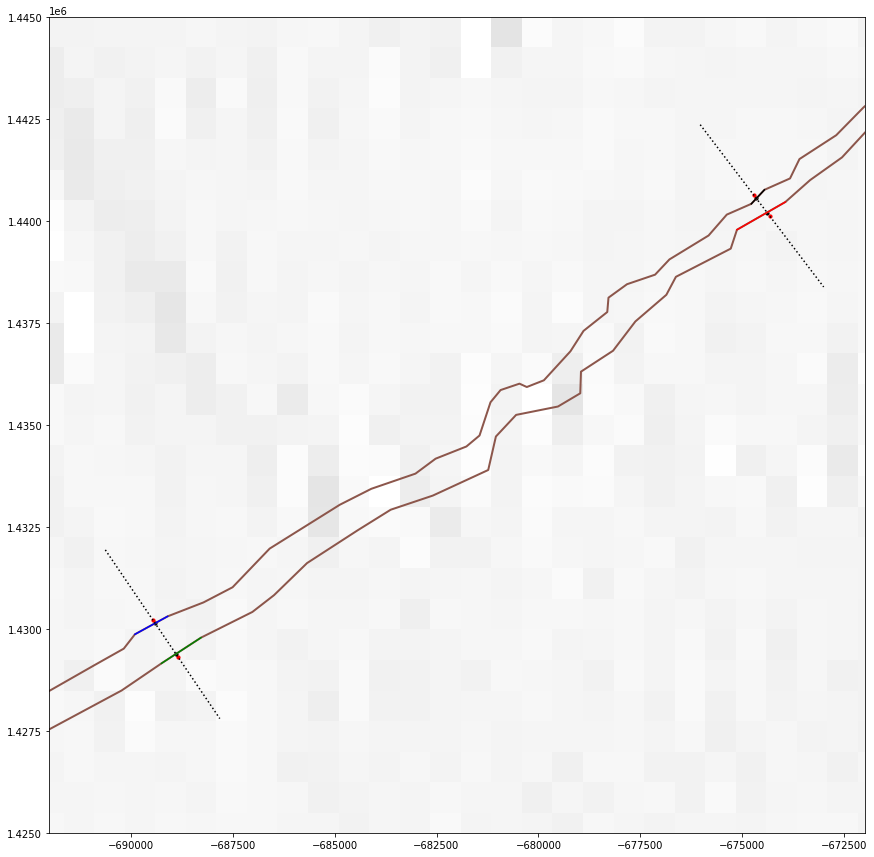

In [11]:
fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)
        
plt.plot(HC_land_2020[21:23, 0], HC_land_2020[21:23, 1],'r')
plt.plot(HC_land_2020[40:42, 0], HC_land_2020[40:42, 1],'g')
plt.plot(HC_sea_2020[12:14, 0], HC_sea_2020[12:14, 1],'b')
plt.plot(HC_sea_2020[37:39, 0], HC_sea_2020[37:39, 1],'k')        

#axes.plot(riftx,rifty,'k:')

#axes.plot(riftx[4:6],rifty[4:6],'r:')
#axes.plot(riftx[8:10],rifty[8:10],'r:')

#axes.scatter(ix,iy,s=20,c='k')

axes.plot([easting_w_n,easting_w_s],[northing_w_n,northing_w_s],'k:')

axes.plot([easting_e_n,easting_e_s],[northing_e_n,northing_e_s],'k:')

#Intersection
[ixw_n_2020,iyw_n_2020] = findIntersection(easting_w_n,northing_w_n,easting_w_s,northing_w_s,
                                           HC_sea_2020[12,0],HC_sea_2020[12,1],HC_sea_2020[13,0],HC_sea_2020[13,1])
                                 
[ixw_s_2020,iyw_s_2020] = findIntersection(easting_w_n,northing_w_n,easting_w_s,northing_w_s,
                                           HC_land_2020[40,0],HC_land_2020[40,1],HC_land_2020[41,0],HC_land_2020[41,1])

[ixe_n_2020,iye_n_2020] = findIntersection(easting_e_n,northing_e_n,easting_e_s,northing_e_s,
                                           HC_sea_2020[37,0],HC_sea_2020[37,1],HC_sea_2020[38,0],HC_sea_2020[38,1])

[ixe_s_2020,iye_s_2020] = findIntersection(easting_e_n,northing_e_n,easting_e_s,northing_e_s,
                                           HC_land_2020[21,0],HC_land_2020[21,1],HC_land_2020[22,0],HC_land_2020[22,1])


ix_2020 = [ixw_n_2020,ixw_s_2020,ixe_n_2020,ixe_s_2020]
iy_2020 = [iyw_n_2020,iyw_s_2020,iye_n_2020,iye_s_2020]

axes.scatter(ix_2020,iy_2020,s=10,c='k')

ixw_2020_dist = dist_buffer * math.sin(rift_45_perp)
iyw_2020_dist = dist_buffer * math.cos(rift_45_perp)

ixw_n_2020_buf = ixw_n_2020 + ixw_2020_dist
iyw_n_2020_buf = iyw_n_2020 + iyw_2020_dist
ixw_s_2020_buf = ixw_s_2020 - ixw_2020_dist
iyw_s_2020_buf = iyw_s_2020 - iyw_2020_dist

ixe_2020_dist = dist_buffer * math.sin(rift_89_perp)
iye_2020_dist = dist_buffer * math.cos(rift_89_perp)

ixe_n_2020_buf = ixe_n_2020 + ixe_2020_dist
iye_n_2020_buf = iye_n_2020 + iye_2020_dist
ixe_s_2020_buf = ixe_s_2020 - ixe_2020_dist
iye_s_2020_buf = iye_s_2020 - iye_2020_dist

ix_2020_buf = [ixw_n_2020_buf,ixw_s_2020_buf,ixe_n_2020_buf,ixe_s_2020_buf]
iy_2020_buf = [iyw_n_2020_buf,iyw_s_2020_buf,iye_n_2020_buf,iye_s_2020_buf]

axes.scatter(ix_2020_buf,iy_2020_buf,s=10,c='r')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### Extraction points at calving 

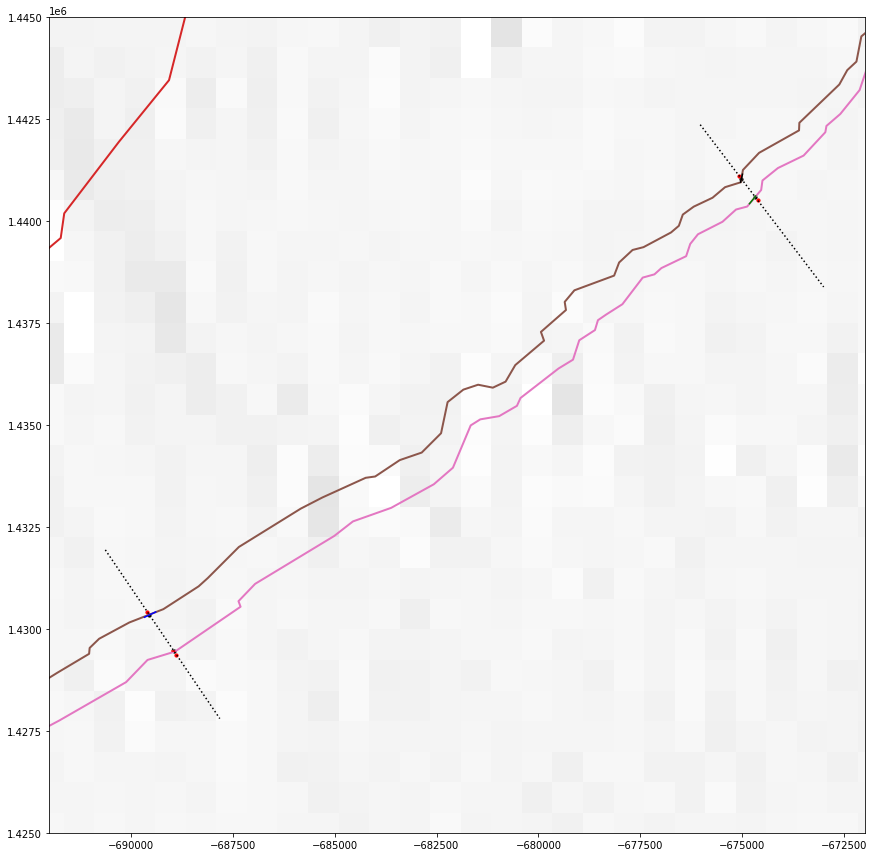

In [12]:
fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)        

plt.plot(HC_land_calv[41:43, 0], HC_land_calv[41:43, 1],'r')
plt.plot(HC_land_calv[127:129, 0], HC_land_calv[127:129, 1],'g')
plt.plot(HC_sea_calv[39:41, 0], HC_sea_calv[39:41, 1],'b')
plt.plot(HC_sea_calv[110:112, 0], HC_sea_calv[110:112, 1],'k')


#axes.plot(riftx,rifty,'k:')

#axes.plot(riftx[4:6],rifty[4:6],'r:')
#axes.plot(riftx[8:10],rifty[8:10],'r:')

#axes.scatter(ix,iy,s=20,c='k')

axes.plot([easting_w_n,easting_w_s],[northing_w_n,northing_w_s],'k:')

axes.plot([easting_e_n,easting_e_s],[northing_e_n,northing_e_s],'k:')

#Intersection
[ixw_n_calv,iyw_n_calv] = findIntersection(easting_w_n,northing_w_n,easting_w_s,northing_w_s,
                                           HC_sea_calv[39,0],HC_sea_calv[39,1],HC_sea_calv[40,0],HC_sea_calv[40,1])
                                 
[ixw_s_calv,iyw_s_calv] = findIntersection(easting_w_n,northing_w_n,easting_w_s,northing_w_s,
                                           HC_land_calv[41,0],HC_land_calv[41,1],HC_land_calv[42,0],HC_land_calv[42,1])

[ixe_n_calv,iye_n_calv] = findIntersection(easting_e_n,northing_e_n,easting_e_s,northing_e_s,
                                           HC_sea_calv[110,0],HC_sea_calv[110,1],HC_sea_calv[111,0],HC_sea_calv[111,1])

[ixe_s_calv,iye_s_calv] = findIntersection(easting_e_n,northing_e_n,easting_e_s,northing_e_s,
                                           HC_land_calv[127,0],HC_land_calv[127,1],HC_land_calv[128,0],HC_land_calv[128,1])


ix_calv = [ixw_n_calv,ixw_s_calv,ixe_n_calv,ixe_s_calv]
iy_calv = [iyw_n_calv,iyw_s_calv,iye_n_calv,iye_s_calv]

axes.scatter(ix_calv,iy_calv,s=10,c='k')

#Distance from rift walls
ixw_calv_dist = dist_buffer * math.sin(rift_45_perp)
iyw_calv_dist = dist_buffer * math.cos(rift_45_perp)

ixw_n_calv_buf = ixw_n_calv + ixw_calv_dist
iyw_n_calv_buf = iyw_n_calv + iyw_calv_dist
ixw_s_calv_buf = ixw_s_calv - ixw_calv_dist
iyw_s_calv_buf = iyw_s_calv - iyw_calv_dist

ixe_calv_dist = dist_buffer * math.sin(rift_89_perp)
iye_calv_dist = dist_buffer * math.cos(rift_89_perp)

ixe_n_calv_buf = ixe_n_calv + ixe_calv_dist
iye_n_calv_buf = iye_n_calv + iye_calv_dist
ixe_s_calv_buf = ixe_s_calv - ixe_calv_dist
iye_s_calv_buf = iye_s_calv - iye_calv_dist

ix_calv_buf = [ixw_n_calv_buf,ixw_s_calv_buf,ixe_n_calv_buf,ixe_s_calv_buf]
iy_calv_buf = [iyw_n_calv_buf,iyw_s_calv_buf,iye_n_calv_buf,iye_s_calv_buf]

axes.scatter(ix_calv_buf,iy_calv_buf,s=10,c='r')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### Extraction points 2021

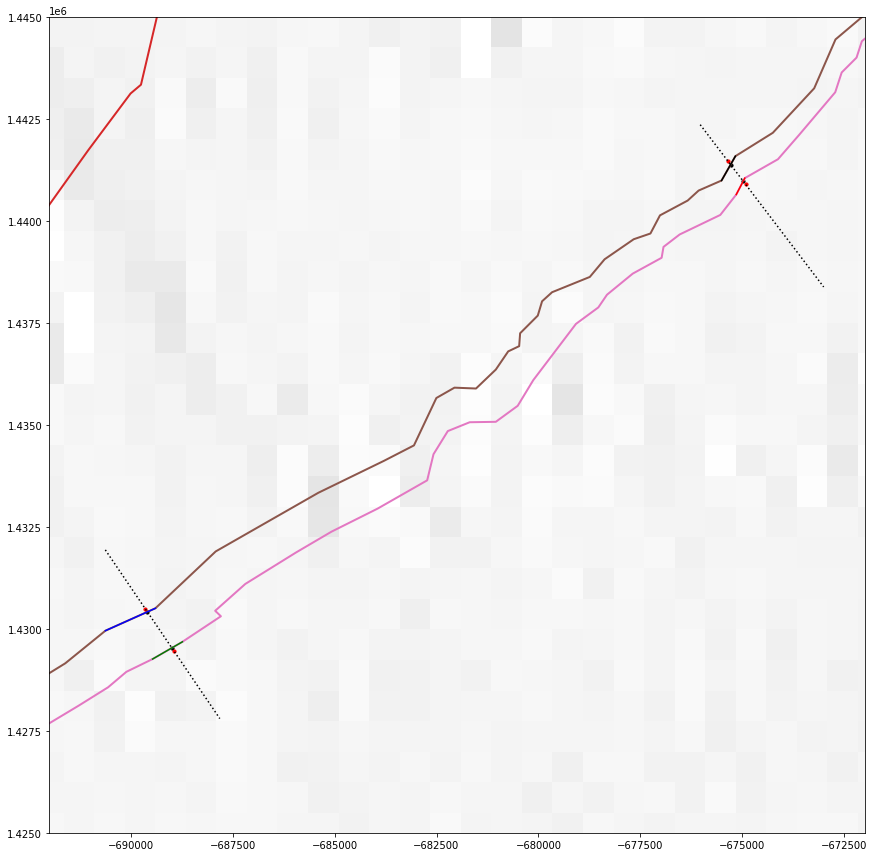

In [13]:
fig, axes = plt.subplots(1,1, figsize=(15,15))

axes.imshow(image, cmap="Greys_r", vmin=12e3, vmax=16.38e3, extent=extent)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)        

plt.plot(HC_land_2021[22:24, 0], HC_land_2021[22:24, 1],'r')
plt.plot(HC_land_2021[45:47, 0], HC_land_2021[45:47, 1],'g')
plt.plot(HC_sea_2021[10:12, 0], HC_sea_2021[10:12, 1],'b')
plt.plot(HC_sea_2021[33:35, 0], HC_sea_2021[33:35, 1],'k')


#axes.plot(riftx,rifty,'k:')

#axes.plot(riftx[4:6],rifty[4:6],'r:')
#axes.plot(riftx[8:10],rifty[8:10],'r:')

#axes.scatter(ix,iy,s=20,c='k')

axes.plot([easting_w_n,easting_w_s],[northing_w_n,northing_w_s],'k:')

axes.plot([easting_e_n,easting_e_s],[northing_e_n,northing_e_s],'k:')

#Intersection
[ixw_n_2021,iyw_n_2021] = findIntersection(easting_w_n,northing_w_n,easting_w_s,northing_w_s,
                                           HC_sea_2021[10,0],HC_sea_2021[10,1],HC_sea_2021[11,0],HC_sea_2021[11,1])
                                 
[ixw_s_2021,iyw_s_2021] = findIntersection(easting_w_n,northing_w_n,easting_w_s,northing_w_s,
                                           HC_land_2021[45,0],HC_land_2021[45,1],HC_land_2021[46,0],HC_land_2021[46,1])

[ixe_n_2021,iye_n_2021] = findIntersection(easting_e_n,northing_e_n,easting_e_s,northing_e_s,
                                           HC_sea_2021[33,0],HC_sea_2021[33,1],HC_sea_2021[34,0],HC_sea_2021[34,1])

[ixe_s_2021,iye_s_2021] = findIntersection(easting_e_n,northing_e_n,easting_e_s,northing_e_s,
                                           HC_land_2021[22,0],HC_land_2021[22,1],HC_land_2021[23,0],HC_land_2021[23,1])


ix_2021 = [ixw_n_2021,ixw_s_2021,ixe_n_2021,ixe_s_2021]
iy_2021 = [iyw_n_2021,iyw_s_2021,iye_n_2021,iye_s_2021]

axes.scatter(ix_2021,iy_2021,s=10,c='k')

#Distance from rift walls
ixw_2021_dist = dist_buffer * math.sin(rift_45_perp)
iyw_2021_dist = dist_buffer * math.cos(rift_45_perp)

ixw_n_2021_buf = ixw_n_2021 + ixw_2021_dist
iyw_n_2021_buf = iyw_n_2021 + iyw_2021_dist
ixw_s_2021_buf = ixw_s_2021 - ixw_2021_dist
iyw_s_2021_buf = iyw_s_2021 - iyw_2021_dist

ixe_2021_dist = dist_buffer * math.sin(rift_89_perp)
iye_2021_dist = dist_buffer * math.cos(rift_89_perp)

ixe_n_2021_buf = ixe_n_2021 + ixe_2021_dist
iye_n_2021_buf = iye_n_2021 + iye_2021_dist
ixe_s_2021_buf = ixe_s_2021 - ixe_2021_dist
iye_s_2021_buf = iye_s_2021 - iye_2021_dist

ix_2021_buf = [ixw_n_2021_buf,ixw_s_2021_buf,ixe_n_2021_buf,ixe_s_2021_buf]
iy_2021_buf = [iyw_n_2021_buf,iyw_s_2021_buf,iye_n_2021_buf,iye_s_2021_buf]

axes.scatter(ix_2021_buf,iy_2021_buf,s=10,c='r')

axes.set_xlim(xmin_ew,xmax_ew)
axes.set_ylim(ymin_ew,ymax_ew)

plt.show()

### Outputs

In [14]:
print("Ground track angles")
print("western pair: "+str(round(math.degrees(rift_45_perp),1))+" deg")
print("western pair: "+str(round(rift_45_perp,2))+" rad")
print("eastern pair: "+str(round(math.degrees(rift_89_perp),1))+" deg")
print("western pair: "+str(round(rift_89_perp,2))+" rad")
print("")
print("Extraction points 2020")
print("western Pair, north of rift: "+str(round(ixw_n_2020_buf,1))+", "+ str(round(iyw_n_2020_buf,1)))
print("western Pair, south of rift: "+str(round(ixw_s_2020_buf,1))+", "+ str(round(iyw_s_2020_buf,1)))
print("eastern Pair, north of rift: "+str(round(ixe_n_2020_buf,1))+", "+ str(round(iye_n_2020_buf,1)))
print("eastern Pair, south of rift: "+str(round(ixe_s_2020_buf,1))+", "+ str(round(iye_s_2020_buf,1)))
print("")
print("Extraction points calving")
print("western Pair, north of rift: "+str(round(ixw_n_calv_buf,1))+", "+ str(round(iyw_n_calv_buf,1)))
print("western Pair, south of rift: "+str(round(ixw_s_calv_buf,1))+", "+ str(round(iyw_s_calv_buf,1)))
print("eastern Pair, north of rift: "+str(round(ixe_n_calv_buf,1))+", "+ str(round(iye_n_calv_buf,1)))
print("eastern Pair, south of rift: "+str(round(ixe_s_calv_buf,1))+", "+ str(round(iye_s_calv_buf,1)))
print("")
print("Extraction points 2021")
print("western Pair, north of rift: "+str(round(ixw_n_2021_buf,1))+", "+ str(round(iyw_n_2021_buf,1)))
print("western Pair, south of rift: "+str(round(ixw_s_2021_buf,1))+", "+ str(round(iyw_s_2021_buf,1)))
print("eastern Pair, north of rift: "+str(round(ixe_n_2021_buf,1))+", "+ str(round(iye_n_2021_buf,1)))
print("eastern Pair, south of rift: "+str(round(ixe_s_2021_buf,1))+", "+ str(round(iye_s_2021_buf,1)))
print("")

ex_locs = {
    "west_angle": rift_45_perp,
    "east_angle": rift_89_perp,
    "w_n_x_2020": ixw_n_2020_buf,
    "w_n_y_2020": iyw_n_2020_buf,
    "w_s_x_2020": ixw_s_2020_buf,
    "w_s_y_2020": iyw_s_2020_buf,
    "e_n_x_2020": ixe_n_2020_buf,
    "e_n_y_2020": iye_n_2020_buf,
    "e_s_x_2020": ixe_s_2020_buf,
    "e_s_y_2020": iye_s_2020_buf,
    "w_n_x_calv": ixw_n_calv_buf,
    "w_n_y_calv": iyw_n_calv_buf,
    "w_s_x_calv": ixw_s_calv_buf,
    "w_s_y_calv": iyw_s_calv_buf,
    "e_n_x_calv": ixe_n_calv_buf,
    "e_n_y_calv": iye_n_calv_buf,
    "e_s_x_calv": ixe_s_calv_buf,
    "e_s_y_calv": iye_s_calv_buf,
    "w_n_x_2021": ixw_n_2021_buf,
    "w_n_y_2021": iyw_n_2021_buf,
    "w_s_x_2021": ixw_s_2021_buf,
    "w_s_y_2021": iyw_s_2021_buf,
    "e_n_x_2021": ixe_n_2021_buf,
    "e_n_y_2021": iye_n_2021_buf,
    "e_s_x_2021": ixe_s_2021_buf,
    "e_s_y_2021": iye_s_2021_buf,
}

outp1 = open("output_extraction_locations.pkl", "wb")

pickle.dump(ex_locs,outp1)

outp1.close()

for_plotting = {
    "xmin": xmin,
    "xmax": xmax,
    "ymin": ymin,
    "ymax": ymax,
    "xmin_ew": xmin_ew,
    "xmax_ew": xmax_ew,
    "ymin_ew": ymin_ew,
    "ymax_ew": ymax_ew,
    "xcen_w": -689000,
    "ycen_w": 1429500,
    "xcen_e": -674500,
    "ycen_e": 1440500,
    "delta": 2000,
    "easting_w_n": easting_w_n,
    "northing_w_n": northing_w_n,
    "easting_w_s": easting_w_s,
    "northing_w_s": northing_w_s,
    "easting_e_n": easting_e_n,
    "northing_e_n": northing_e_n,
    "easting_e_s": easting_e_s,
    "northing_e_s": northing_e_s
}

outp2 = open("output_for_plotting.pkl", "wb")

pickle.dump(for_plotting,outp2)

outp2.close()

Ground track angles
western pair: -34.2 deg
western pair: -0.6 rad
eastern pair: -37.3 deg
western pair: -0.65 rad

Extraction points 2020
western Pair, north of rift: -689458.9, 1430222.9
western Pair, south of rift: -688835.3, 1429303.9
eastern Pair, north of rift: -674715.8, 1440638.5
eastern Pair, south of rift: -674332.5, 1440134.8

Extraction points calving
western Pair, north of rift: -689597.5, 1430427.2
western Pair, south of rift: -688880.2, 1429370.1
eastern Pair, north of rift: -675083.4, 1441121.6
eastern Pair, south of rift: -674624.8, 1440518.9

Extraction points 2021
western Pair, north of rift: -689647.9, 1430501.4
western Pair, south of rift: -688935.8, 1429451.9
eastern Pair, north of rift: -675347.5, 1441468.7
eastern Pair, south of rift: -674916.8, 1440902.7

